In [1]:
# pip install citipy

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 641


['vila velha',
 'makakilo city',
 'belushya guba',
 'punta arenas',
 'lebu',
 'fortuna',
 'ushuaia',
 'rawson',
 'tawkar',
 'caldas da rainha',
 'busselton',
 'ponta do sol',
 'puerto ayora',
 'lorengau',
 'cidreira',
 'doctor pedro p. pena',
 'provideniya',
 'east london',
 'burkhala',
 'yichun',
 'hilo',
 'hermanus',
 'yagodnoye',
 'puyo',
 'rikitea',
 'sumbe',
 'lakatoro',
 'la ronge',
 'caravelas',
 'stephenville',
 'albany',
 'tuktoyaktuk',
 'moscow',
 'barentsburg',
 'mar del plata',
 'sibolga',
 'waipawa',
 'mitsamiouli',
 'vaini',
 'jamestown',
 'kontagora',
 'cabatuan',
 'west bay',
 'saint-philippe',
 'talnakh',
 'nelson bay',
 'serpa',
 'zyryanka',
 'port townsend',
 'swift current',
 'poum',
 'atuona',
 'bredasdorp',
 'dikson',
 'constitucion',
 'camacha',
 'tiksi',
 'hobart',
 'pevek',
 'port alfred',
 'illoqqortoormiut',
 'sentyabrskiy',
 'sindgi',
 'zaysan',
 'lufilufi',
 'oktyabrskoye',
 'iqaluit',
 'aklavik',
 'morant bay',
 'palmas',
 'avigliana',
 'gua musang',
 'nik

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?unitsMetric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_max_temp_celsius = city_max_temp - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_celsius,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | makakilo city
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | rawson
Processing Record 9 of Set 1 | tawkar
City not found. Skipping...
Processing Record 10 of Set 1 | caldas da rainha
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | burkhala
City not found. Skipping...
Processing Record

Processing Record 35 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 4 | presidencia roque saenz pena
Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | santa vitoria do palmar
Processing Record 39 of Set 4 | chokurdakh
Processing Record 40 of Set 4 | druzhba
Processing Record 41 of Set 4 | keuruu
Processing Record 42 of Set 4 | belaya gora
Processing Record 43 of Set 4 | kilindoni
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | ati
Processing Record 49 of Set 4 | barawe
City not found. Skipping...
Processing Record 0 of Set 5 | polovinnoye
Processing Record 1 of Set 5 | yakeshi
Processing Record 2 of Set 5 | chitrakonda
Processing Record 3 of Set 5 | pudozh
Processing Record 4 of Set 5 | tagusao
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | odweyne
Proce

Processing Record 21 of Set 8 | mandalgovi
Processing Record 22 of Set 8 | chumikan
Processing Record 23 of Set 8 | amderma
City not found. Skipping...
Processing Record 24 of Set 8 | bauta
Processing Record 25 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 26 of Set 8 | longyearbyen
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | maun
Processing Record 29 of Set 8 | khonuu
City not found. Skipping...
Processing Record 30 of Set 8 | egvekinot
Processing Record 31 of Set 8 | cabra
Processing Record 32 of Set 8 | magistralnyy
Processing Record 33 of Set 8 | loandjili
Processing Record 34 of Set 8 | sendhwa
Processing Record 35 of Set 8 | tigil
Processing Record 36 of Set 8 | lakes entrance
Processing Record 37 of Set 8 | vammala
Processing Record 38 of Set 8 | puerto lempira
Processing Record 39 of Set 8 | sur
Processing Record 40 of Set 8 | bismil
Processing Record 41 of Set 8 | mutis
Processing Record 42 of Set 8 | jiddah
City n

Processing Record 8 of Set 12 | balimo
City not found. Skipping...
Processing Record 9 of Set 12 | beruwala
Processing Record 10 of Set 12 | sobolevo
Processing Record 11 of Set 12 | takoradi
Processing Record 12 of Set 12 | sept-iles
Processing Record 13 of Set 12 | plovdiv
Processing Record 14 of Set 12 | lompoc
Processing Record 15 of Set 12 | longkou
Processing Record 16 of Set 12 | san felipe
Processing Record 17 of Set 12 | sinop
Processing Record 18 of Set 12 | san quintin
Processing Record 19 of Set 12 | honningsvag
Processing Record 20 of Set 12 | quetzaltepec
City not found. Skipping...
Processing Record 21 of Set 12 | puerto escondido
Processing Record 22 of Set 12 | kokstad
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | port hawkesbury
Processing Record 25 of Set 12 | tinoto
Processing Record 26 of Set 12 | alpena
Processing Record 27 of Set 12 | karaul
City not found. Skipping...
Processing Record 28 of Set 12 | salem
Processing Record 29 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila velha,-20.3297,-40.2925,24.41,77,40,1.54,BR,1680514193
1,makakilo city,21.3469,-158.0858,20.25,92,100,1.54,US,1680514252
2,punta arenas,-53.1500,-70.9167,9.06,61,75,5.14,CL,1680514060
3,lebu,-37.6167,-73.6500,10.23,88,4,5.70,CL,1680514275
4,fortuna,40.5982,-124.1573,3.29,92,88,0.89,US,1680514256


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila velha,-20.3297,-40.2925,24.41,77,40,1.54,BR,1680514193
1,makakilo city,21.3469,-158.0858,20.25,92,100,1.54,US,1680514252
2,punta arenas,-53.1500,-70.9167,9.06,61,75,5.14,CL,1680514060
3,lebu,-37.6167,-73.6500,10.23,88,4,5.70,CL,1680514275
4,fortuna,40.5982,-124.1573,3.29,92,88,0.89,US,1680514256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

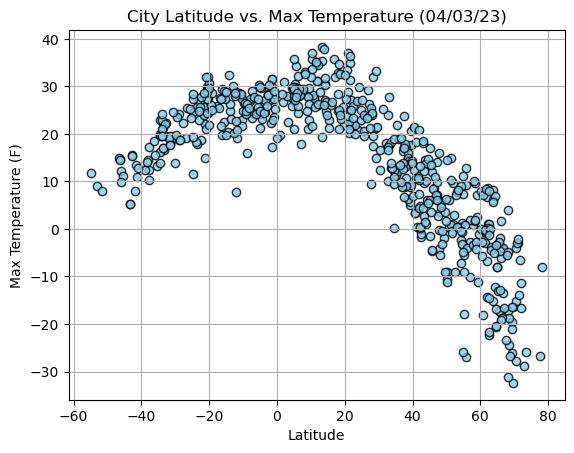

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue", alpha=0.8, marker="o", linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x")); plt.xlabel("Latitude"); plt.ylabel("Max Temperature (F)"); plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

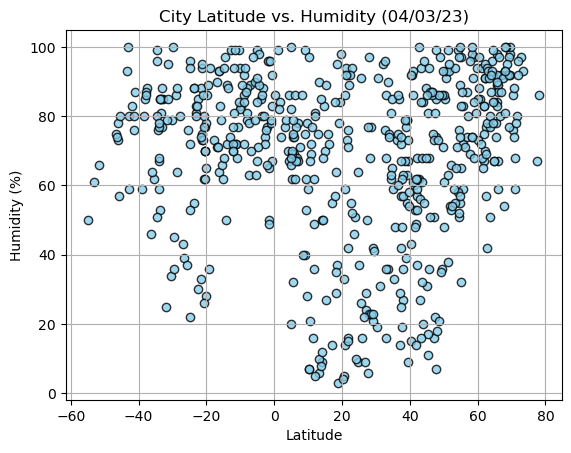

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue", alpha=0.8, marker="o", linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x")); plt.xlabel("Latitude"); plt.ylabel("Humidity (%)"); plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

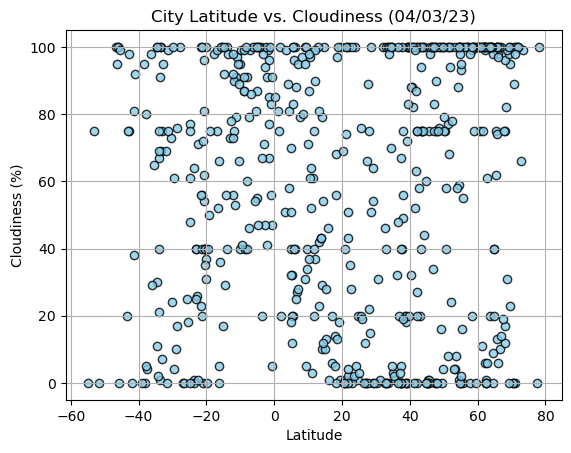

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue", alpha=0.8, marker="o", linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x")); plt.xlabel("Latitude"); plt.ylabel("Cloudiness (%)"); plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

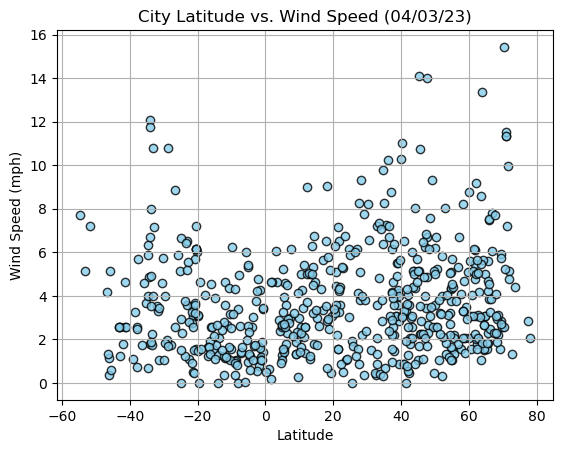

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="skyblue", alpha=0.8, marker="o", linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x")); plt.xlabel("Latitude"); plt.ylabel("Wind Speed (mph)"); plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship
## Define a function to create Linear Regression plots


In [13]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate regression values and line equation
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Plot the data and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Annotate the plot with line equation and r-value
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,makakilo city,21.3469,-158.0858,20.25,92,100,1.54,US,1680514252
4,fortuna,40.5982,-124.1573,3.29,92,88,0.89,US,1680514256
7,caldas da rainha,39.4033,-9.1384,17.75,67,100,0.89,PT,1680514338
9,ponta do sol,32.6667,-17.1000,23.89,76,46,0.37,PT,1680514349
13,provideniya,64.3833,-173.3000,-12.23,96,100,1.53,RU,1680514284


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila velha,-20.3297,-40.2925,24.41,77,40,1.54,BR,1680514193
2,punta arenas,-53.1500,-70.9167,9.06,61,75,5.14,CL,1680514060
3,lebu,-37.6167,-73.6500,10.23,88,4,5.70,CL,1680514275
5,ushuaia,-54.8000,-68.3000,11.81,50,0,7.72,AR,1680514247
6,rawson,-43.3002,-65.1023,5.16,93,20,2.57,AR,1680514348


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7783379664887935


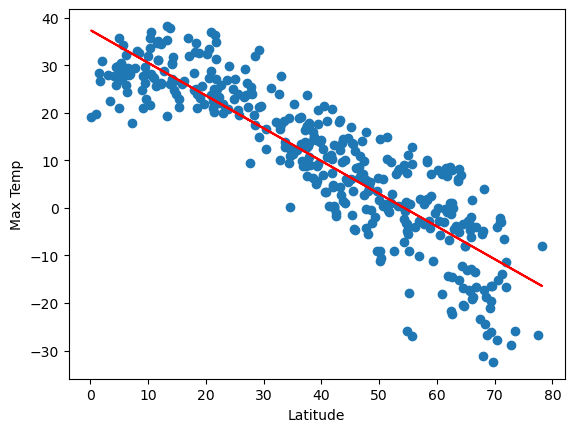

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (10, -40))

The r-value is: 0.5014320614371514


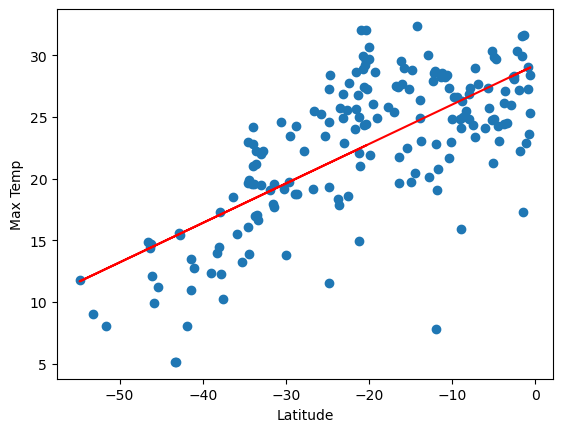

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-50, 90))

**Discussion about the linear relationship:** 

There is a strong linear relationship between temperature and latitude in both the Northern and Southern hemispheres. The r-value for the Northern Hemisphere is 0.78, indicating a strong positive correlation, while the r-value for the Southern Hemisphere is 0.50, indicating a moderate positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10615796700408826


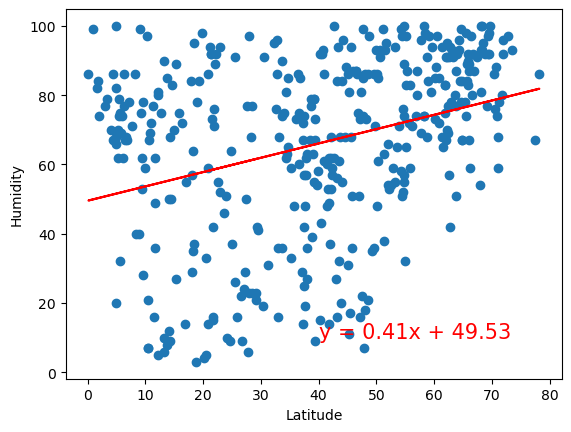

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40, 10))

The r-value is: 0.03125444378700593


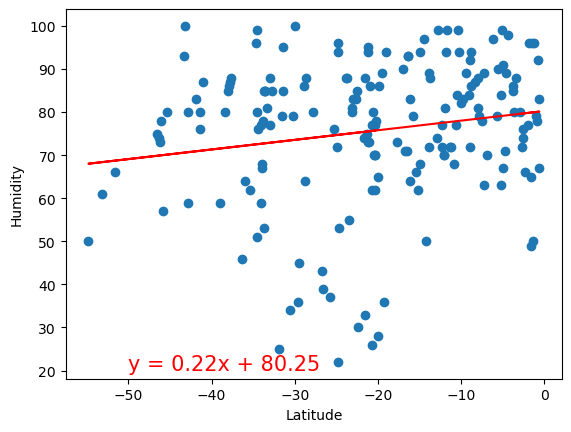

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50, 20))

**Discussion about the linear relationship:** 

There is a weak linear relationship between humidity and latitude in both the Northern and Southern hemispheres. The r-value for the Northern Hemisphere is 0.11, indicating a very weak positive correlation, while the r-value for the Southern Hemisphere is 0.03, indicating almost no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.027574590825064388


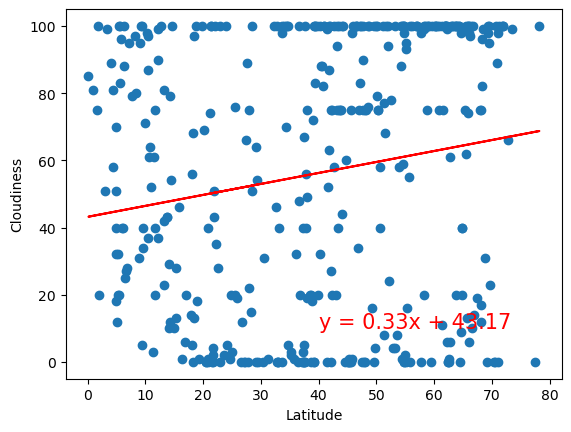

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (40, 10))

The r-value is: 0.06755592920128956


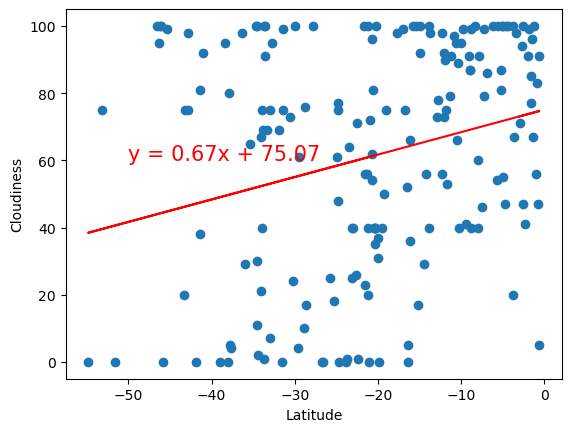

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-50, 60))

**Discussion about the linear relationship:** 
    
There is a very weak linear relationship between cloudiness and latitude in both the Northern and Southern hemispheres. The r-value for the Northern Hemisphere is 0.03, indicating almost no correlation, while the r-value for the Southern Hemisphere is 0.07, indicating a very weak positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02350537231193712


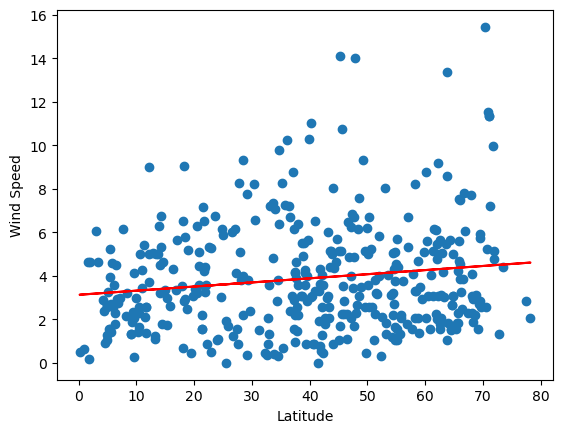

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (40, 25))

The r-value is: 0.0834392357260762


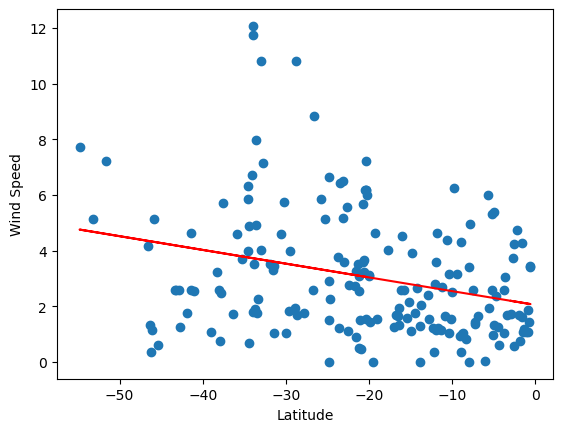

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 20))

**Discussion about the linear relationship:** 
    
There is almost no linear relationship between wind speed and latitude in both the Northern and Southern hemispheres. The r-value for the Northern Hemisphere is 0.02, indicating almost no correlation, while the r-value for the Southern Hemisphere is 0.08, indicating a very weak positive correlation.